# Dissociation curve

MyBigDFT comes with some classes implementing particular workflows of calculations. These workflows define a queue of jobs, that can easily be run sequentially, without having to worry about the Job context manager. They also generally define a particular post-processing procedure, run after all the BigDFT calculations in order to extract some meaningful imformation.

The example provided here shows how to obtain the dissociation curve of the N$_2$ molecule by using the [Dissocation](https://mmoriniere.gitlab.io/MyBigDFT/dissociation.html) class.

## Initialization

You first need to import some useful classes to define a ground state calculation as well as the `Dissociation` class, that is a workflow:

In [1]:
import numpy as np
from mybigdft import Posinp, Atom, InputParams
from mybigdft.workflows import Dissociation

## The [Dissocation](https://mmoriniere.gitlab.io/MyBigDFT/dissociation.html) class

This class allows to compute the dissocation curve of two subsystems. To that end, you need to define two subsystems via ``Posinp`` instances (here, both subsystems are the same nitrogen atom) and a set of distances between those two subsystems. From these data, the ``Dissociation`` class defines a queue of jobs, that differ only by the initial positions: for each specified distance between both subsytem, the second fragment is translated by that amount along the $y$ direction. This means you could study the dissociation curve of two surfaces or of a molecule or of a single atom on top of that surface. 

Of course, you can specify the input parameters you want to use for all these calculations, via the ``inputparams`` argument. You may also want to give a specific name to the runs and a specific folder where to run them, as usual.

In [2]:
frag1 = Posinp([Atom('N', [0.0, 0.0, 0.0])], units="angstroem", boundary_conditions="free")
distances = np.arange(0.95, 1.25, 0.05)
inp = InputParams()  # You might want to specify some non-default input parameters
dc = Dissociation(frag1, frag1, distances, inputparams=inp,
                  name="N2", run_dir="N2/dissociation_curve")

Running the workflow is done as usual:

In [3]:
dc.run(nmpi=6, nomp=3)

/Users/maximemoriniere/Documents/Python/MyBigDFT/doc/source/notebooks/N2/dissociation_curve/y_0.95
Logfile log-N2.yaml already exists!

/Users/maximemoriniere/Documents/Python/MyBigDFT/doc/source/notebooks/N2/dissociation_curve/y_1.0
Logfile log-N2.yaml already exists!

/Users/maximemoriniere/Documents/Python/MyBigDFT/doc/source/notebooks/N2/dissociation_curve/y_1.05
Logfile log-N2.yaml already exists!

/Users/maximemoriniere/Documents/Python/MyBigDFT/doc/source/notebooks/N2/dissociation_curve/y_1.1
Logfile log-N2.yaml already exists!

/Users/maximemoriniere/Documents/Python/MyBigDFT/doc/source/notebooks/N2/dissociation_curve/y_1.1500000000000001
Logfile log-N2.yaml already exists!

/Users/maximemoriniere/Documents/Python/MyBigDFT/doc/source/notebooks/N2/dissociation_curve/y_1.2000000000000002
Logfile log-N2.yaml already exists!

/Users/maximemoriniere/Documents/Python/MyBigDFT/doc/source/notebooks/N2/dissociation_curve/y_1.2500000000000002
Logfile log-N2.yaml already exists!



You can check that the initial positions are as expected:

In [4]:
for job in dc.queue:
    print(job.run_dir, job.name)
    print(job.posinp)

/Users/maximemoriniere/Documents/Python/MyBigDFT/doc/source/notebooks/N2/dissociation_curve/y_0.95 N2
2   angstroem
free
N   0.0   0.0   0.0
N   0.0   0.95   0.0

/Users/maximemoriniere/Documents/Python/MyBigDFT/doc/source/notebooks/N2/dissociation_curve/y_1.0 N2
2   angstroem
free
N   0.0   0.0   0.0
N   0.0   1.0   0.0

/Users/maximemoriniere/Documents/Python/MyBigDFT/doc/source/notebooks/N2/dissociation_curve/y_1.05 N2
2   angstroem
free
N   0.0   0.0   0.0
N   0.0   1.05   0.0

/Users/maximemoriniere/Documents/Python/MyBigDFT/doc/source/notebooks/N2/dissociation_curve/y_1.1 N2
2   angstroem
free
N   0.0   0.0   0.0
N   0.0   1.1   0.0

/Users/maximemoriniere/Documents/Python/MyBigDFT/doc/source/notebooks/N2/dissociation_curve/y_1.1500000000000001 N2
2   angstroem
free
N   0.0   0.0   0.0
N   0.0   1.15   0.0

/Users/maximemoriniere/Documents/Python/MyBigDFT/doc/source/notebooks/N2/dissociation_curve/y_1.2000000000000002 N2
2   angstroem
free
N   0.0   0.0   0.0
N   0.0   1.2   0.0


The ``Dissociation`` class also has an ``energies`` attribute, storing the energy of each calculation. This is useful to plot the dissociation curve (see below).

In [5]:
dc.energies

[-19.805444659275025,
 -19.85497382791818,
 -19.878933352041976,
 -19.884549270710195,
 -19.877164837418295,
 -19.86087438302971,
 -19.838574516454937]

A more readable summary can be done as follows (thanks to the ``distance`` attribute of each job of the queue):

In [6]:
for job in dc.queue:
    print(f"d = {job.distance:.2f} {job.posinp.units}: {job.logfile.energy:.4f} Ha")

d = 0.95 angstroem: -19.8054 Ha
d = 1.00 angstroem: -19.8550 Ha
d = 1.05 angstroem: -19.8789 Ha
d = 1.10 angstroem: -19.8845 Ha
d = 1.15 angstroem: -19.8772 Ha
d = 1.20 angstroem: -19.8609 Ha
d = 1.25 angstroem: -19.8386 Ha


The job with the minimal energy is also stored under the ``minimum`` attribute:

In [7]:
dc.minimum.distance, dc.minimum.logfile.energy

(1.1, -19.884549270710195)

It is then easy to plot the actual dissociation curve:

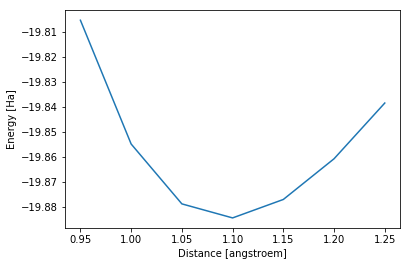

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt

fig=plt.figure()
fig.patch.set_facecolor('white')  # useful when dark background used on jupyter lab
plt.plot(dc.distances, dc.energies)
plt.xlabel("Distance [{}]".format(dc.queue[0].posinp.units))
plt.ylabel("Energy [Ha]")
plt.show()

The results found here are as expected: when performing a geometry optimization of the N$_2$ molecule, you actually get a distance of 1.0935 $\unicode[serif]{xC5}^4$ with default input parameters.

## Some errors are raised:

* ### If periodic boundary conditions are used...

... because it is not possible to define a distance between two fragments under such boundary conditions.

In [9]:
from copy import deepcopy
frag1 = Posinp([Atom('N', [0.0, 0.0, 0.0])], units="angstroem", boundary_conditions="free")
frag2 = deepcopy(frag1)
frag2._boundary_conditions = "periodic"
distances = np.arange(0.95, 1.25, 0.05)
dc3 = Dissociation(frag1, frag2, distances)

ValueError: Cannot compute a dissociation curve with periodic boundary conditions:
1   angstroem
periodic
N   0.0   0.0   0.0


* ### If units differ...

... because the unit conversion is not yet implemented!

In [10]:
from copy import deepcopy
frag1 = Posinp([Atom('N', [0.0, 0.0, 0.0])], units="angstroem", boundary_conditions="free")
frag2 = deepcopy(frag1)
frag2._units = "atomic"
distances = np.arange(0.95, 1.25, 0.05)
dc2 = Dissociation(frag1, frag2, distances)

NotImplementedError: Unit conversion of positions needed